In [1]:
import matplotlib.pyplot as plt             
from tabulate import tabulate              
import matplotlib as mat                 
import seaborn as sns                      
import pandas as pd                   
import numpy as np 

### LEVEL 0: UNDERSTANDING DATA

In [2]:
df=pd.read_csv('DS1_C5_S3_BazilHousing_Data_Hackathon.csv')
df

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


In [3]:
df.head()         #top 5 rows of data

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [4]:
df.tail()         #bottom 5 rows of data

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020
10691,São Paulo,80,2,1,0,0,acept,not furnished,0,1400,165,22,1587


In [5]:
#names of all column
df.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype='object')

In [6]:
#data set information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  int64 
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 1.1+ MB


In [7]:
#null values in column
df.isnull().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

### LEVEL 1: ANALYSIS

In [8]:
#seperating categorical and continuous coulumns
def seprate_data_types(df):
    categorical = []
    continuous = []
    for column in df.columns:                
        if df[column].nunique() < 100:       
            categorical.append(column)
        else:
            continuous.append(column)
            
    return categorical, continuous 
categorical, continuous = seprate_data_types(df)   
from tabulate import tabulate
table = [categorical, continuous]
print(tabulate({"categorical":categorical,
                "continuous": continuous}, headers = ["categorical", "continuous"]))

categorical     continuous
--------------  -------------------
city            area
rooms           hoa (R$)
bathroom        rent amount (R$)
parking spaces  property tax (R$)
floor           fire insurance (R$)
animal          total (R$)
furniture


## Univariate analysis of categorical columns

### User defined function for getting information of categorical columns

In [9]:
def get_info_cat(col):
    print(f"Unique values in {col} are: {df[col].unique()}")
    print(f"Mode of {col} is: {df[col].mode()[0]}")
    print(f"Number of missing values in {col} is: {df[col].isnull().sum()}")
    

### Analysis of rooms column

In [10]:
get_info_cat('rooms')

Unique values in rooms are: [ 2  4  1  3  7  5  8  6 10 13  9]
Mode of rooms is: 3
Number of missing values in rooms is: 0


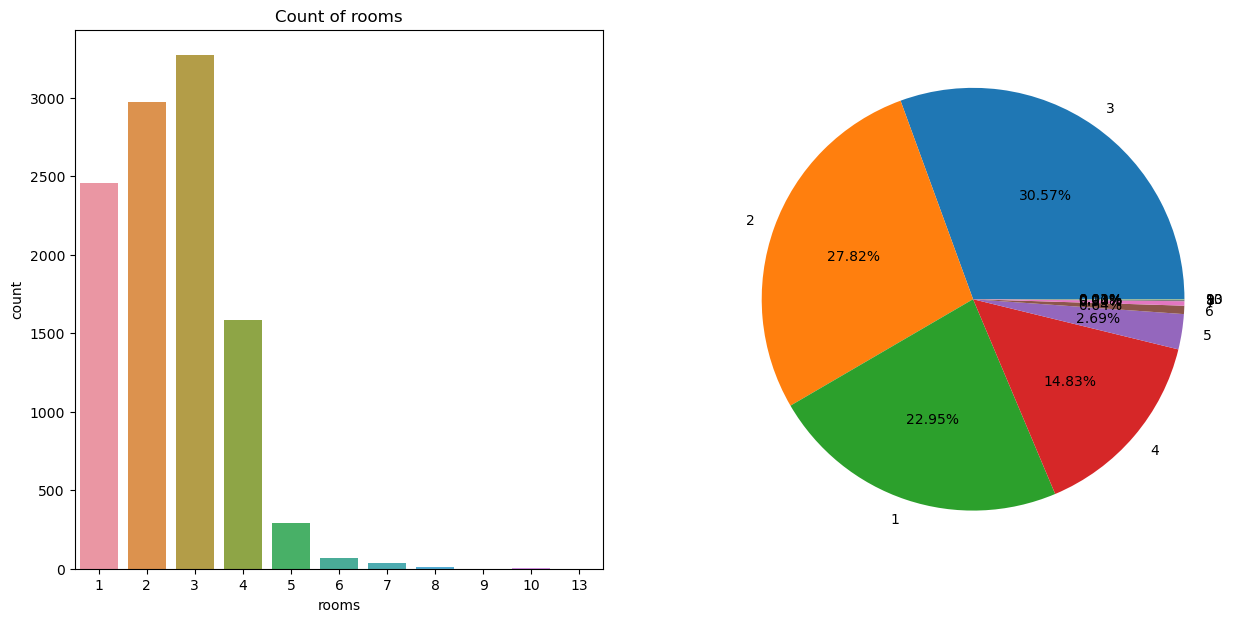

In [11]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of rooms")                  
percentage = df["rooms"].value_counts()         
labels = list(df["rooms"].value_counts().index) 
sns.countplot(x = df["rooms"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  

plt.show()

## The majority of housing in the data set have three rooms

### Analysis of animal column

In [12]:
get_info_cat('animal')

Unique values in animal are: ['acept' 'not acept']
Mode of animal is: acept
Number of missing values in animal is: 0


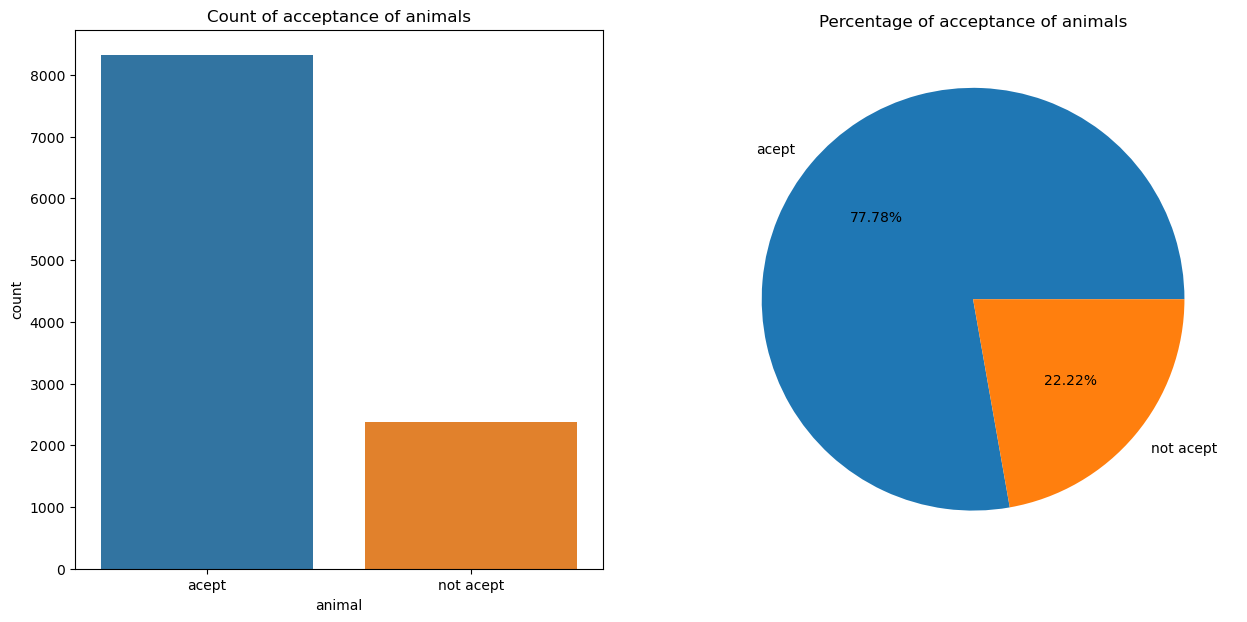

In [13]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of acceptance of animals") 
ax[1].set_title("Percentage of acceptance of animals")
percentage = df["animal"].value_counts()         
labels = list(df["animal"].value_counts().index) 

sns.countplot(x = df["animal"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  
plt.show()

## As we can see in the above chart majority of properties available for rent or sale allows residence to have pet

In [14]:
get_info_cat('furniture')

Unique values in furniture are: ['furnished' 'not furnished']
Mode of furniture is: not furnished
Number of missing values in furniture is: 0


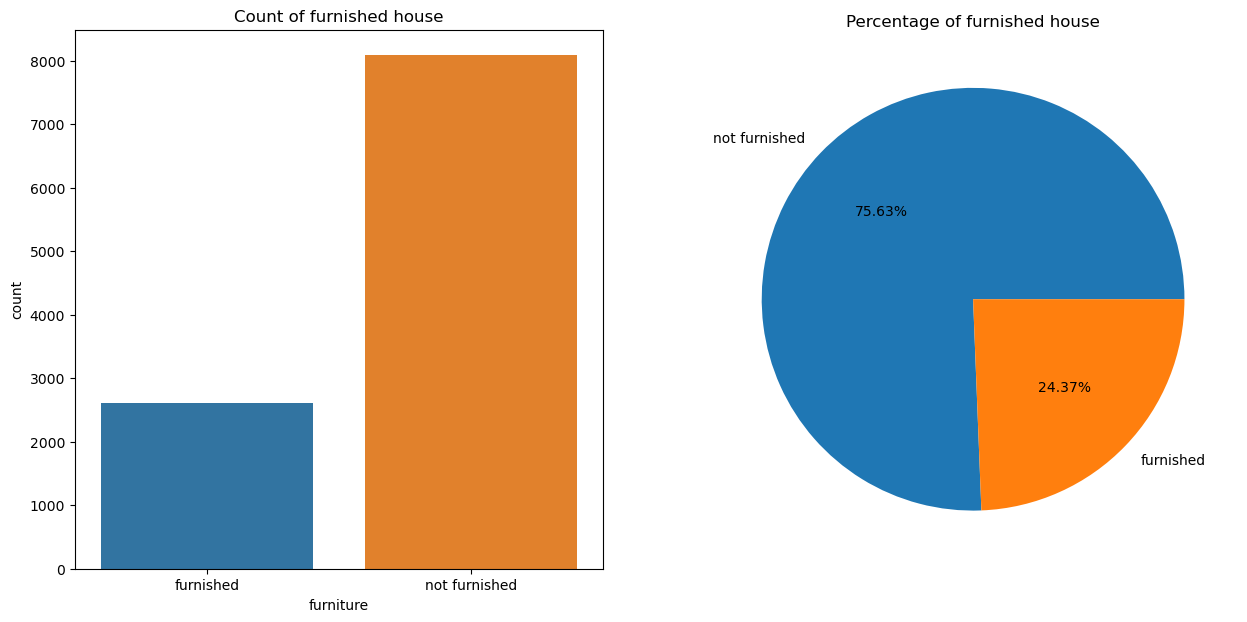

In [15]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of furnished house")
ax[1].set_title("Percentage of furnished house")
percentage = df["furniture"].value_counts()         
labels = list(df["furniture"].value_counts().index) 
sns.countplot(x = df["furniture"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%") 

plt.show()

### By observing above graph we can conclude that majority of properties available for rent or sales do not come with pre existing furniture.

In [16]:
get_info_cat('bathroom')

Unique values in bathroom are: [ 1  4  3  2  6  5  7  9  8 10]
Mode of bathroom is: 1
Number of missing values in bathroom is: 0


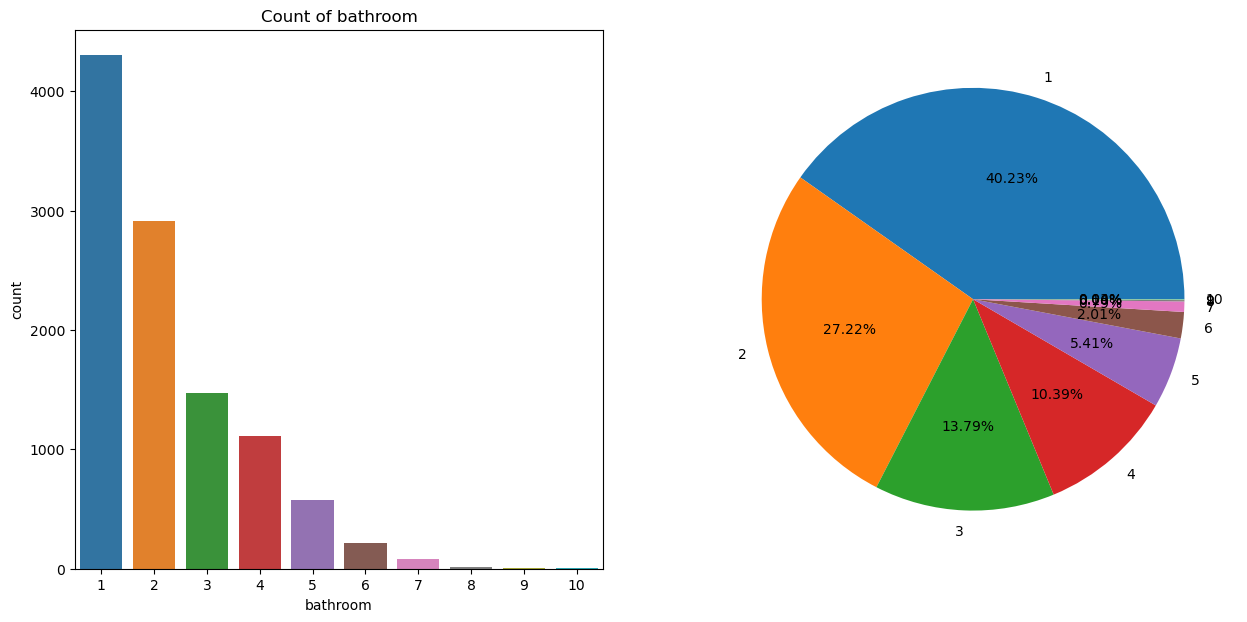

In [17]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of bathroom")                  
percentage = df["bathroom"].value_counts()         
labels = list(df["bathroom"].value_counts().index) 

sns.countplot(x = df["bathroom"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  

plt.show()

### By observing above graph we can conclude that majority of properties available for rent or sales contains 1 bathroom

## Univariate analysis of continuous columns

### User defined function for calculating mean, median, mode,  standard deviation, and count of all null values 

In [18]:
def get_info_num(col):
    print(f"The mean of the {col} is {df[col].mean()}")
    print(f"The median of the {col} is {df[col].median()}")
    print(f"The mode of the {col} is {df[col].mode()[0]}")
    print(f"The standard deviation of the {col} is {df[col].std()}")
    print(f"Number of missing values in the {col} is {df[col].isnull().sum()}")

### Analysis of  the Rent amount

In [19]:
get_info_num('rent amount (R$)')

The mean of the rent amount (R$) is 3896.247194163861
The median of the rent amount (R$) is 2661.0
The mode of the rent amount (R$) is 2500
The standard deviation of the rent amount (R$) is 3408.5455176710816
Number of missing values in the rent amount (R$) is 0


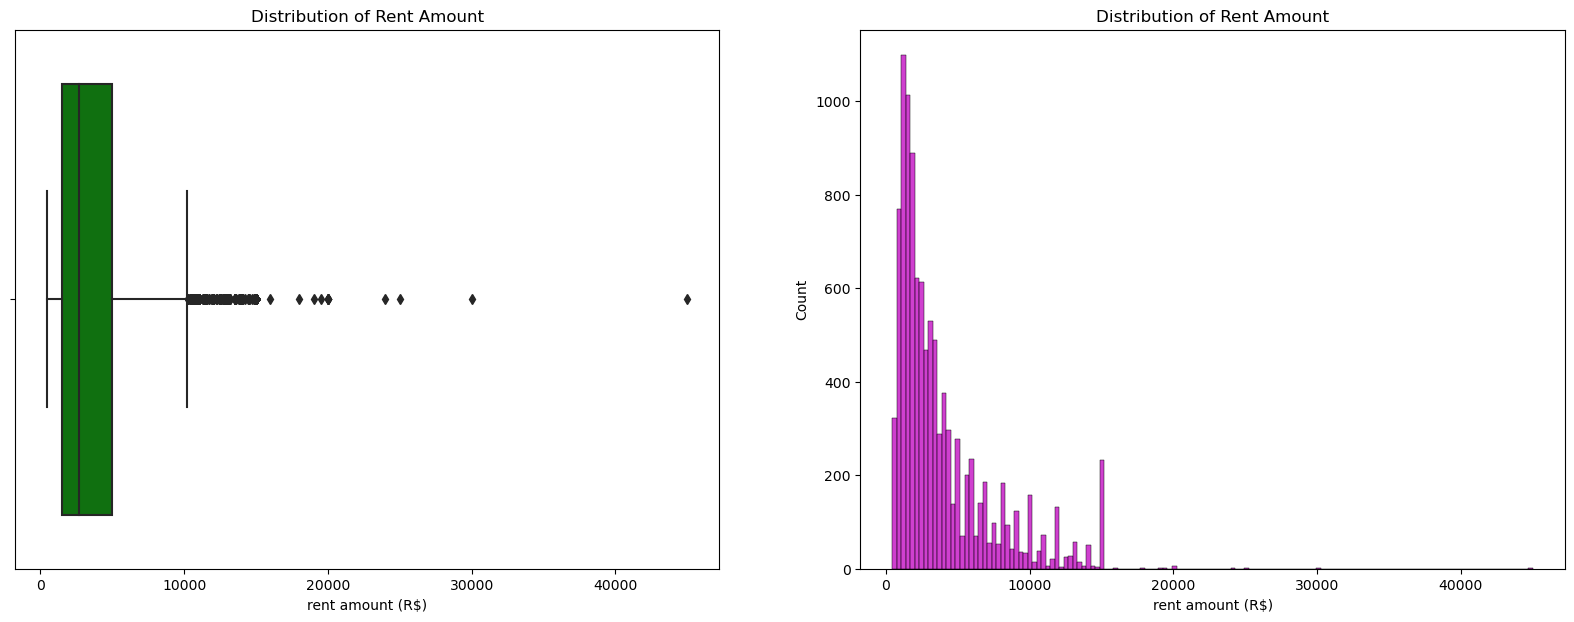

In [20]:
# Distribution of Rent Amount
fig, ax = plt.subplots(1, 2, figsize= (20, 7))                
sns.histplot(x = df["rent amount (R$)"], ax =ax[1], color = "m") 
sns.boxplot(x = df["rent amount (R$)"], ax = ax[0], color = "g") 
ax[0].set_title("Distribution of Rent Amount")
ax[1].set_title("Distribution of Rent Amount")
plt.show()


In [21]:
mean = int(df["rent amount (R$)"].mean())
# accessing the data higher than 6
x = df[df["rent amount (R$)"] > 10000].index
for index in x:
    df.loc[index, "rent amount (R$)"] = mean
    

In [22]:
get_info_num('rent amount (R$)')

The mean of the rent amount (R$) is 3259.319771791994
The median of the rent amount (R$) is 2661.0
The mode of the rent amount (R$) is 3896
The standard deviation of the rent amount (R$) is 2212.3608756405474
Number of missing values in the rent amount (R$) is 0


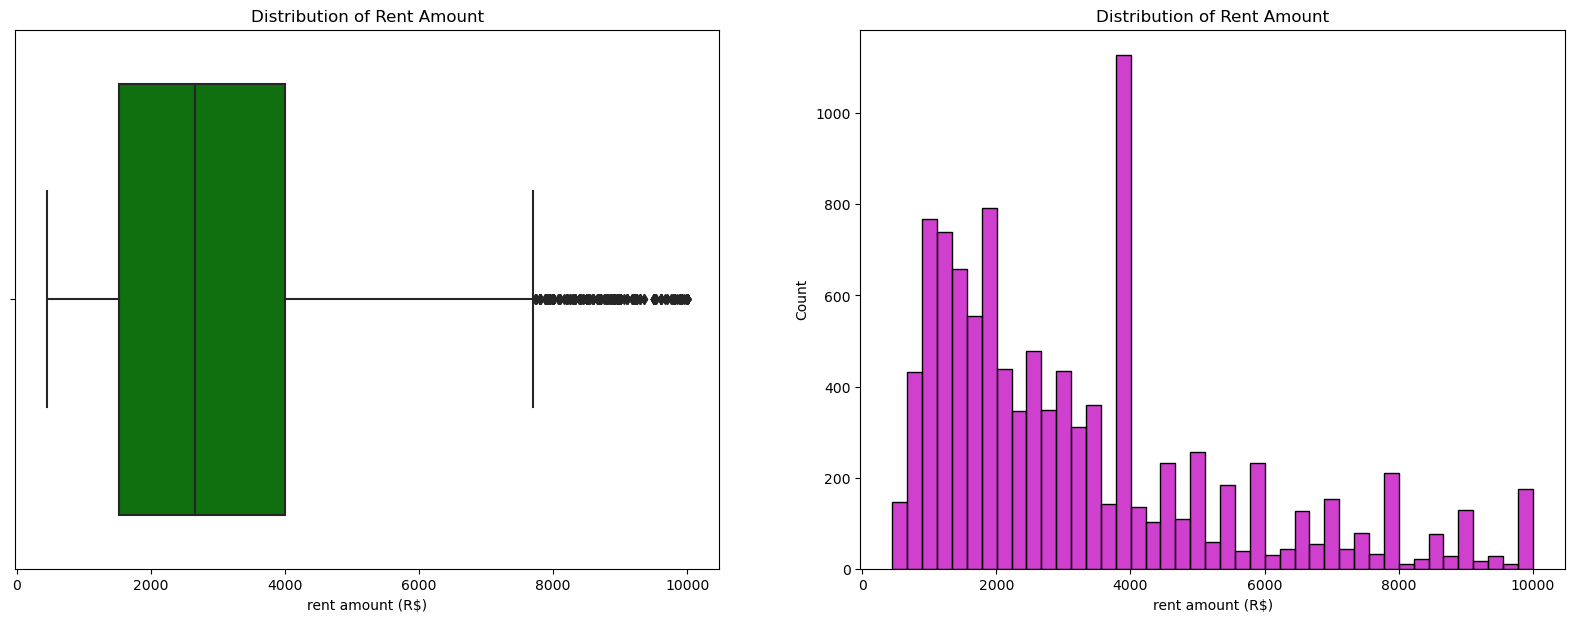

In [23]:
# Distribution of Rent Amount
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               
sns.histplot(x = df["rent amount (R$)"], ax =ax[1], color = "m") 
sns.boxplot(x = df["rent amount (R$)"], ax = ax[0], color = "g") 
ax[0].set_title("Distribution of Rent Amount")
ax[1].set_title("Distribution of Rent Amount")
plt.show()

### By seeing the above graph we can conclude that majority of rent amount is 4000 (R$)

### Analysis of  the property tax (R$)

In [24]:
get_info_num('property tax (R$)')

The mean of the property tax (R$) is 366.70435839880287
The median of the property tax (R$) is 125.0
The mode of the property tax (R$) is 0
The standard deviation of the property tax (R$) is 3107.832321161917
Number of missing values in the property tax (R$) is 0


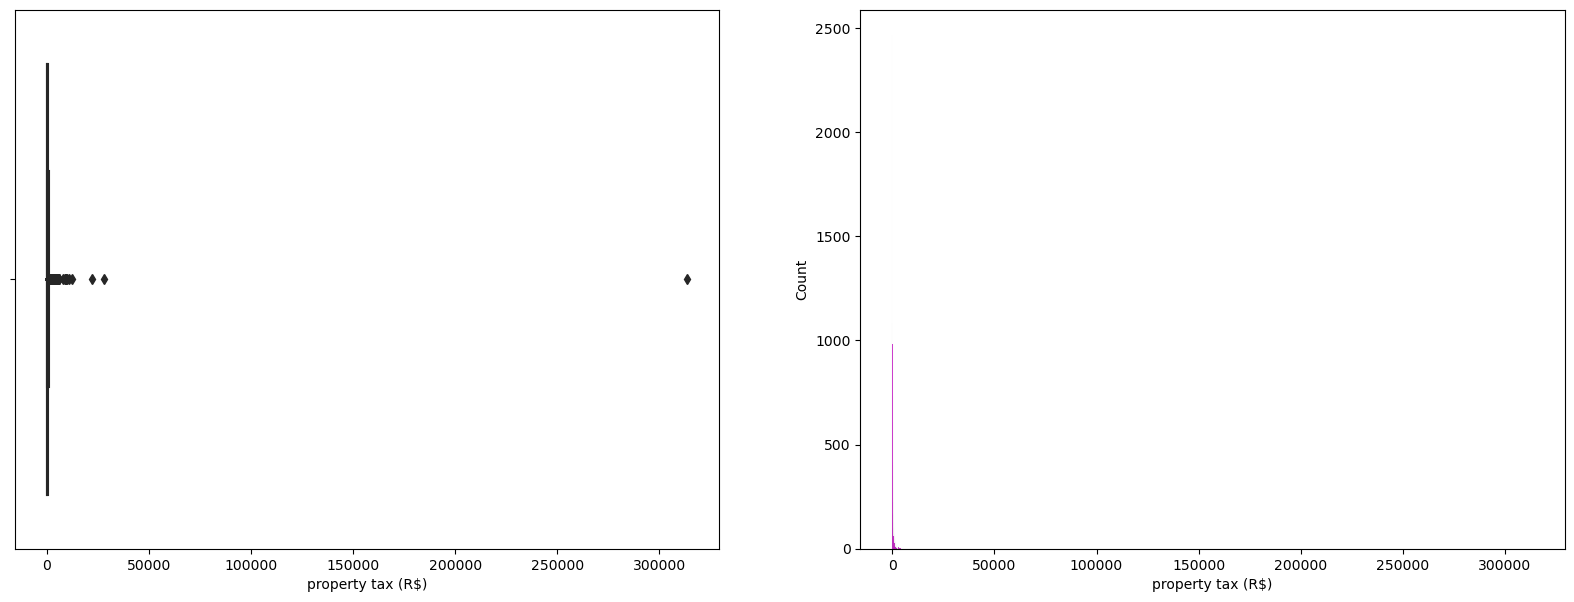

In [25]:
# Distribution of 'property tax (R$)'
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               
sns.histplot(x = df["property tax (R$)"], ax =ax[1], color = "m") 
sns.boxplot(x = df["property tax (R$)"], ax = ax[0], color = "g") 
plt.show()

## As we can see there are outliers in the property tax so we have to identify and remove the outlier

### Analysis of  the property tax (R$)

In [26]:
Q1=df['property tax (R$)'].quantile(0.25)
Q3=df['property tax (R$)'].quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

df.loc[(df['property tax (R$)']<lower_bound) | (df['property tax (R$)']>upper_bound), 'property tax (R$)']=np.nan

clean_value=df[(df['property tax (R$)'].notnull())]['property tax (R$)']
df['property tax (R$)'].fillna(clean_value,inplace=True)

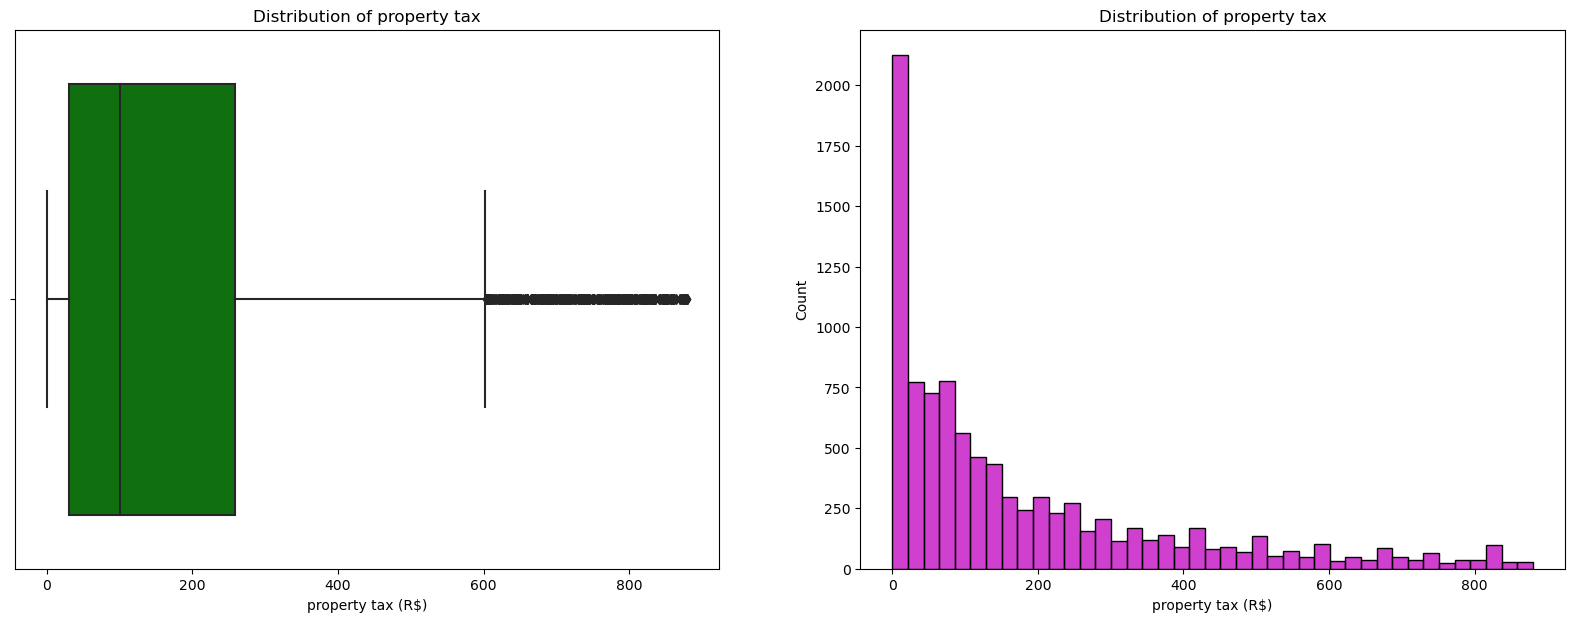

In [27]:
# Distribution of 'property tax (R$)'
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               
sns.histplot(x = df["property tax (R$)"], ax =ax[1], color = "m") 
sns.boxplot(x = df["property tax (R$)"], ax = ax[0], color = "g") 
ax[0].set_title("Distribution of property tax")
ax[1].set_title("Distribution of property tax")
plt.show()

## After removal of outlier by seeing the above graph we can conclude that majority of properties available for rent have no property tax

### Analysis of  the total (R$)

In [28]:
get_info_num('total (R$)')

The mean of the total (R$) is 5490.4869996258885
The median of the total (R$) is 3581.5
The mode of the total (R$) is 2555
The standard deviation of the total (R$) is 16484.72591235027
Number of missing values in the total (R$) is 0


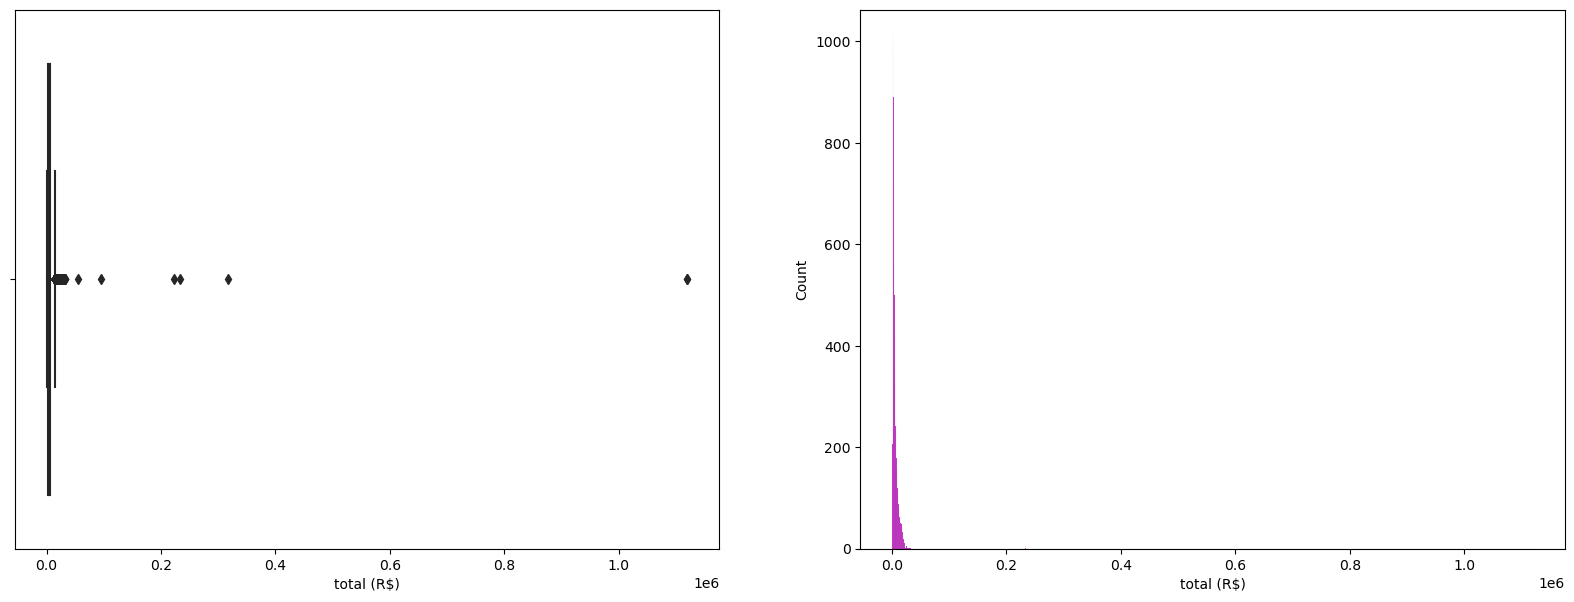

In [29]:
# Distribution of total (R$)
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               
sns.histplot(x = df["total (R$)"], ax =ax[1], color = "m") 
sns.boxplot(x = df["total (R$)"], ax = ax[0], color = "g") 
plt.show()

## As we can see there are outliers in the total (R$) so we have to identify and remove the outlier

In [30]:
Q1=df['total (R$)'].quantile(0.25)
Q3=df['total (R$)'].quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

df.loc[(df['total (R$)']<lower_bound) | (df['total (R$)']>upper_bound), 'total (R$)']=np.nan

clean_value=df[(df['total (R$)'].notnull())]['total (R$)']
df['total (R$)'].fillna(clean_value,inplace=True)

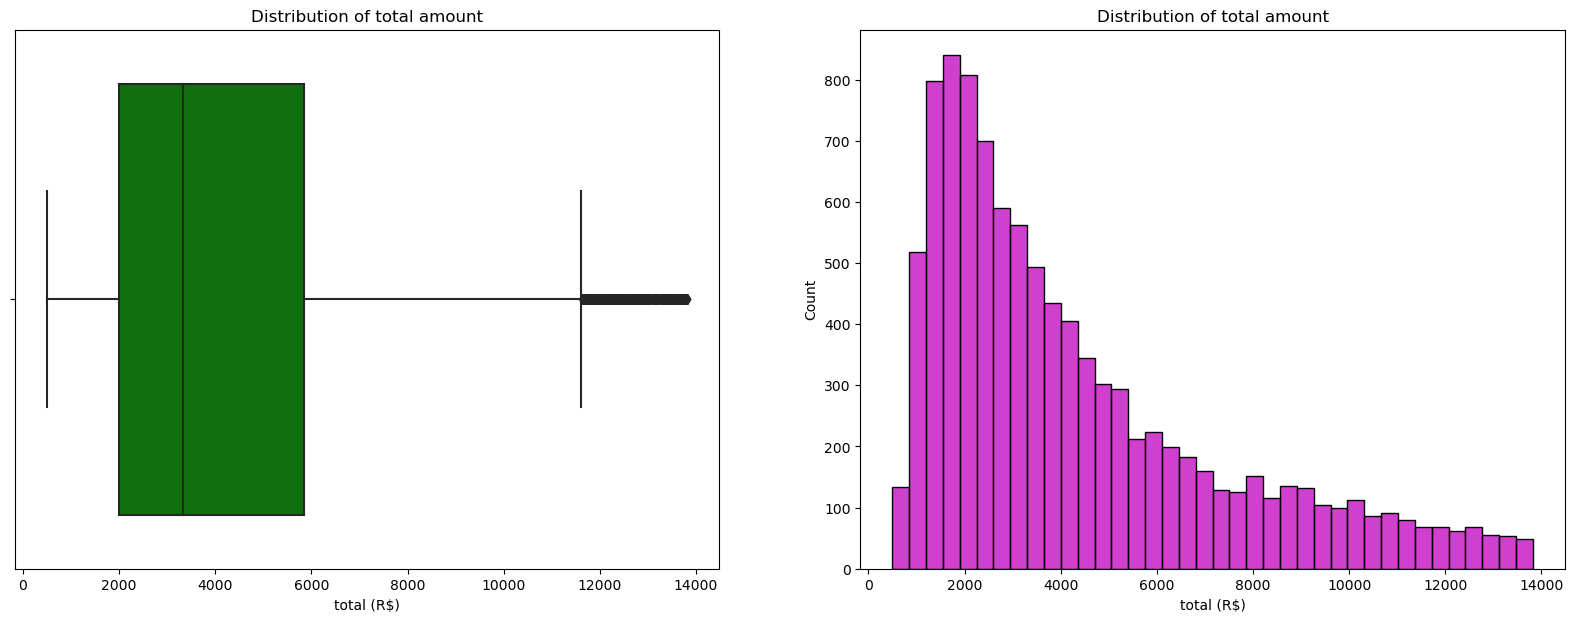

In [31]:
# Distribution of total (R$)
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               
sns.histplot(x = df["total (R$)"], ax =ax[1], color = "m") 
sns.boxplot(x = df["total (R$)"], ax = ax[0], color = "g") 
ax[0].set_title("Distribution of total amount")
ax[1].set_title("Distribution of total amount")
plt.show()

### By observing the above graph we can conclude that most of the total cost for properties available for rent is 2000 (R$)

### Analysis of  area

In [32]:
get_info_num('area')

The mean of the area is 149.21791994014217
The median of the area is 90.0
The mode of the area is 50
The standard deviation of the area is 537.0169423364867
Number of missing values in the area is 0


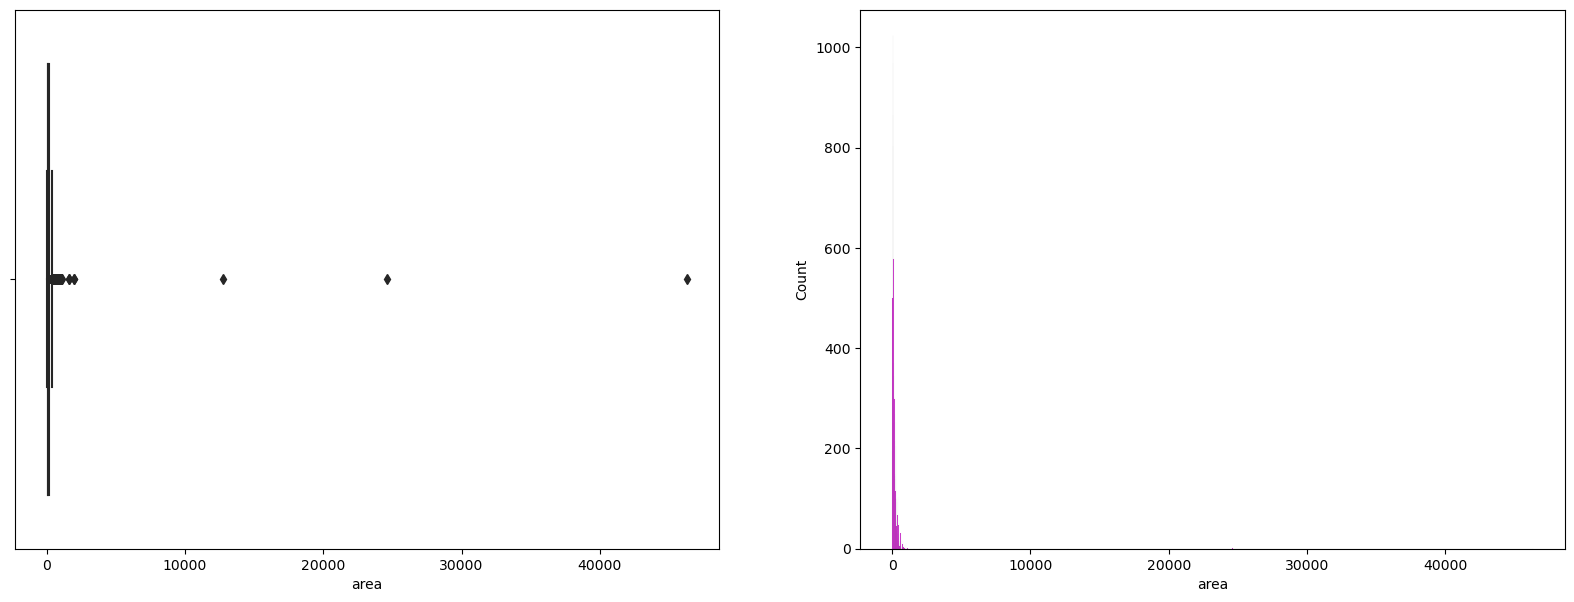

In [33]:
# Distribution of area
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               
sns.histplot(x = df["area"], ax =ax[1], color = "m") 
sns.boxplot(x = df["area"], ax = ax[0], color = "g") 
plt.show()

## As we can see there are outliers in area so we have to identify and remove the outlier

In [34]:
Q1=df['area'].quantile(0.25)
Q3=df['area'].quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

df.loc[(df['area']<lower_bound) | (df['area']>upper_bound), 'area']=np.nan

clean_value=df[(df['area'].notnull())]['area']
df['area'].fillna(clean_value,inplace=True)

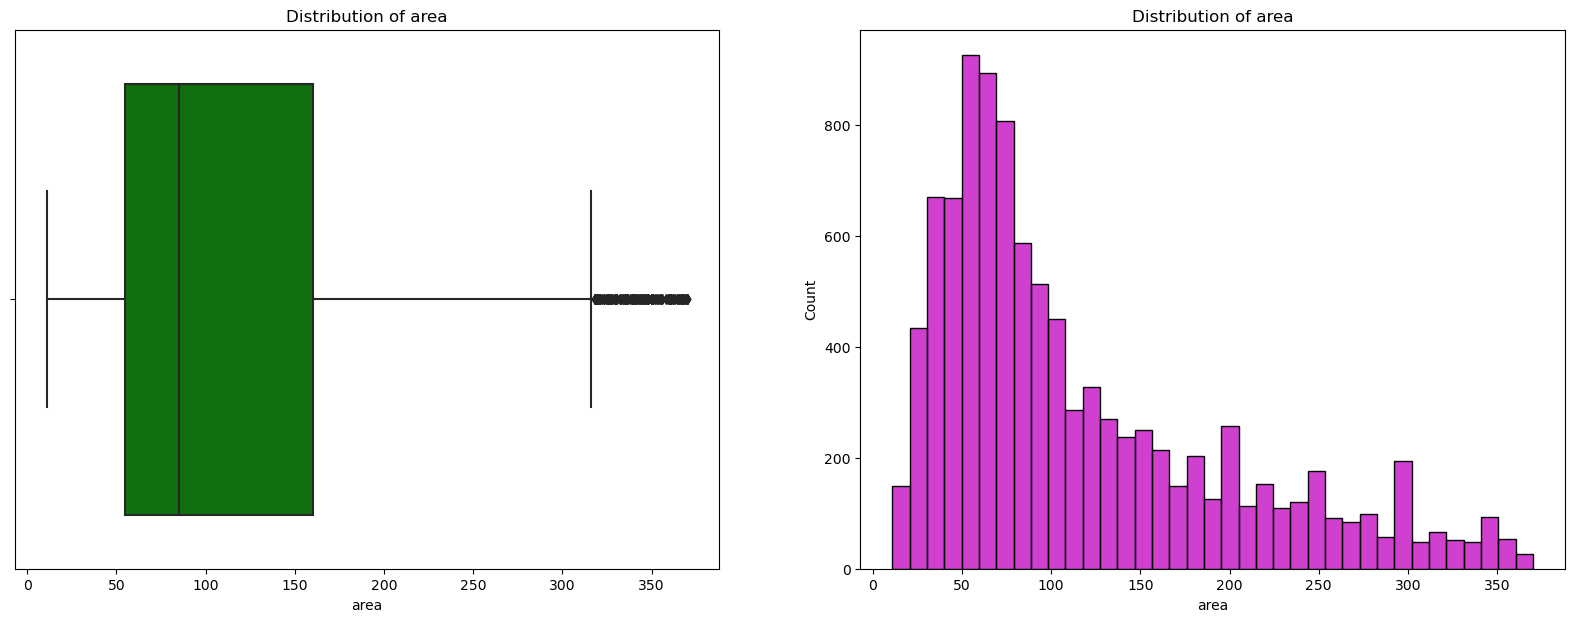

In [35]:
# Distribution of area
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               
sns.histplot(x = df["area"], ax =ax[1], color = "m") 
sns.boxplot(x = df["area"], ax = ax[0], color = "g") 
ax[0].set_title("Distribution of area")
ax[1].set_title("Distribution of area")
plt.show()

### By observing the above graph we can conclude that most of the area of properties available for rent is  50 to 60 square meters

### Analysis of  hoa (R$)

In [36]:
get_info_num('hoa (R$)')

The mean of the hoa (R$) is 1174.0216984661429
The median of the hoa (R$) is 560.0
The mode of the hoa (R$) is 0
The standard deviation of the hoa (R$) is 15592.305248403356
Number of missing values in the hoa (R$) is 0


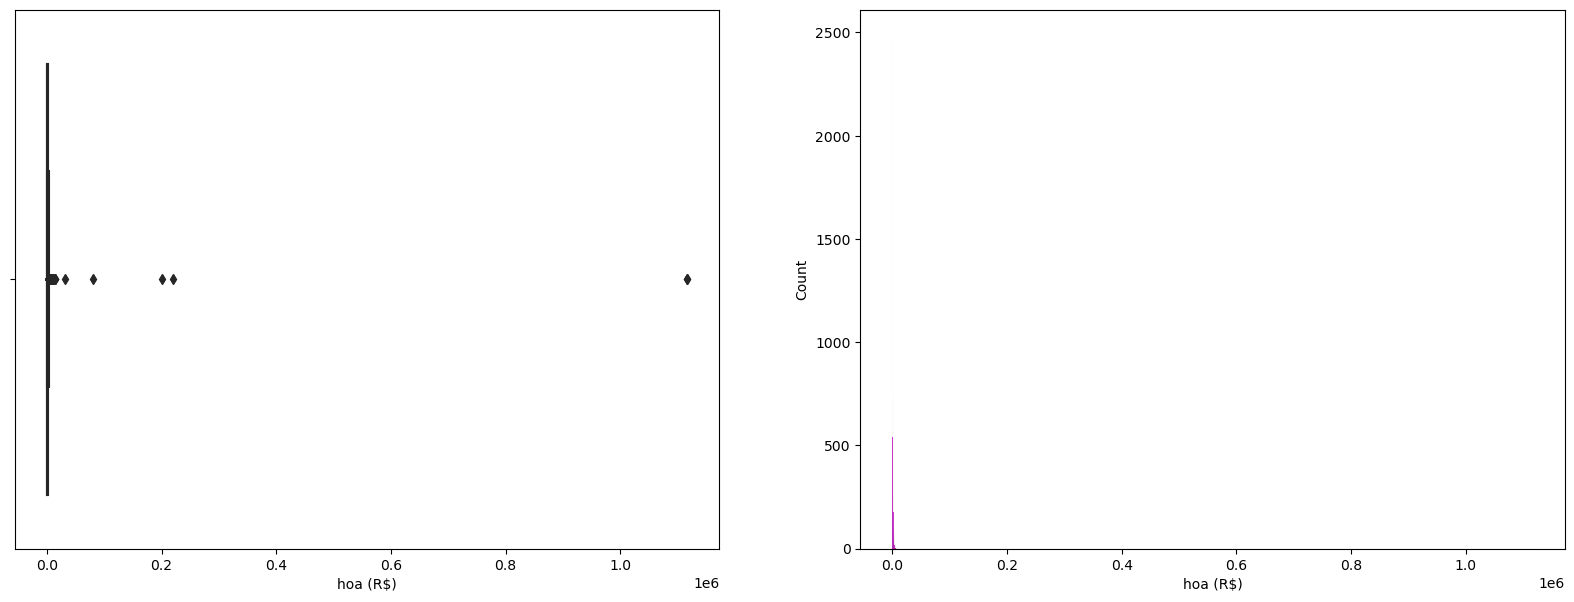

In [37]:
# Distribution of hoa (R$)
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               
sns.histplot(x = df["hoa (R$)"], ax =ax[1], color = "m") 
sns.boxplot(x = df["hoa (R$)"], ax = ax[0], color = "g") 
plt.show()

## As we can see there are outliers in area so we have to identify and remove the outlier

In [38]:
Q1=df['hoa (R$)'].quantile(0.25)
Q3=df['hoa (R$)'].quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

df.loc[(df['hoa (R$)']<lower_bound) | (df['hoa (R$)']>upper_bound), 'hoa (R$)']=np.nan

clean_value=df[(df['hoa (R$)'].notnull())]['hoa (R$)']
df['hoa (R$)'].fillna(clean_value,inplace=True)

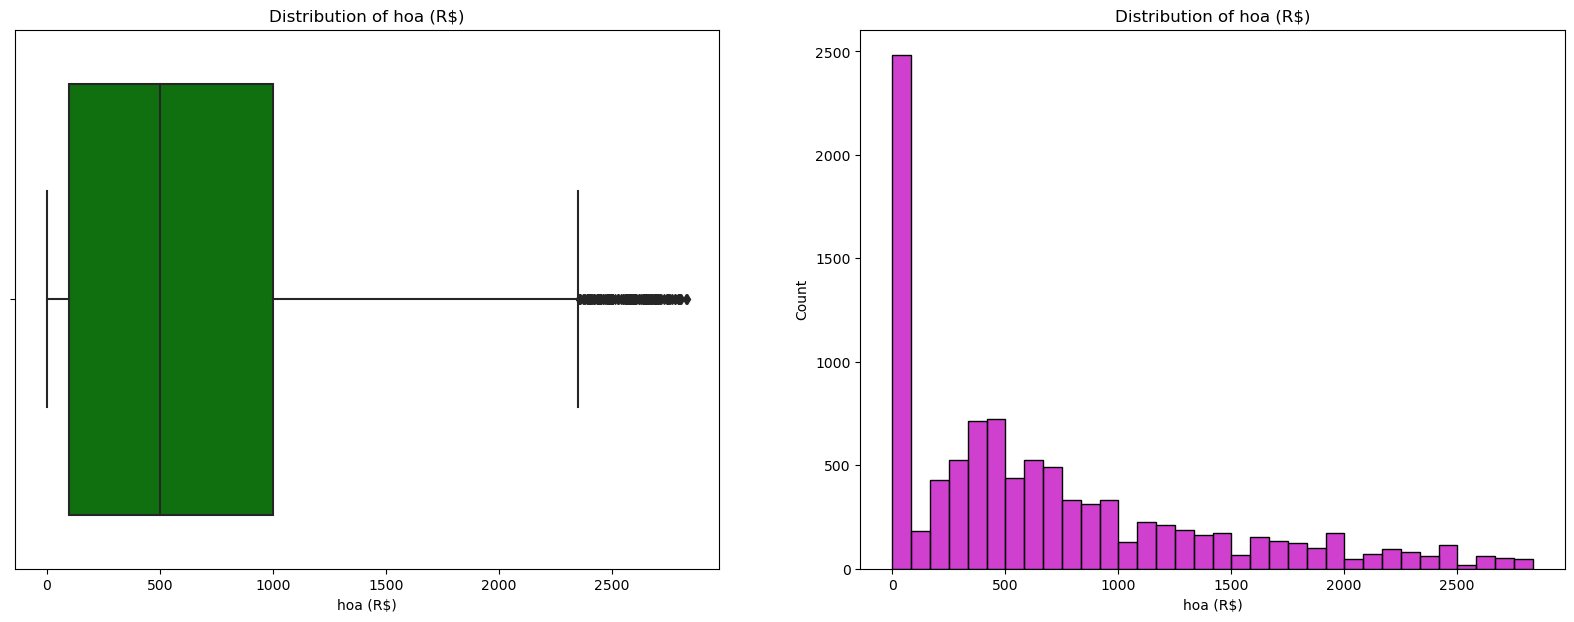

In [39]:
# Distribution of hoa (R$)
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               
sns.histplot(x = df["hoa (R$)"], ax =ax[1], color = "m") 
sns.boxplot(x = df["hoa (R$)"], ax = ax[0], color = "g")
ax[0].set_title("Distribution of hoa (R$)")
ax[1].set_title("Distribution of hoa (R$)")
plt.show()

## After removal of outlier by seeing the above graph we can conclude that majority of properties available for rent have no homeowner association tax

# Levels for Data Exploration

* Level 2 : Bi-Variate Analysis
* Lever 3 : Multivariate Analysis and asking questions from data 

## Level 2: Analysis

### Relationship of City with Rooms

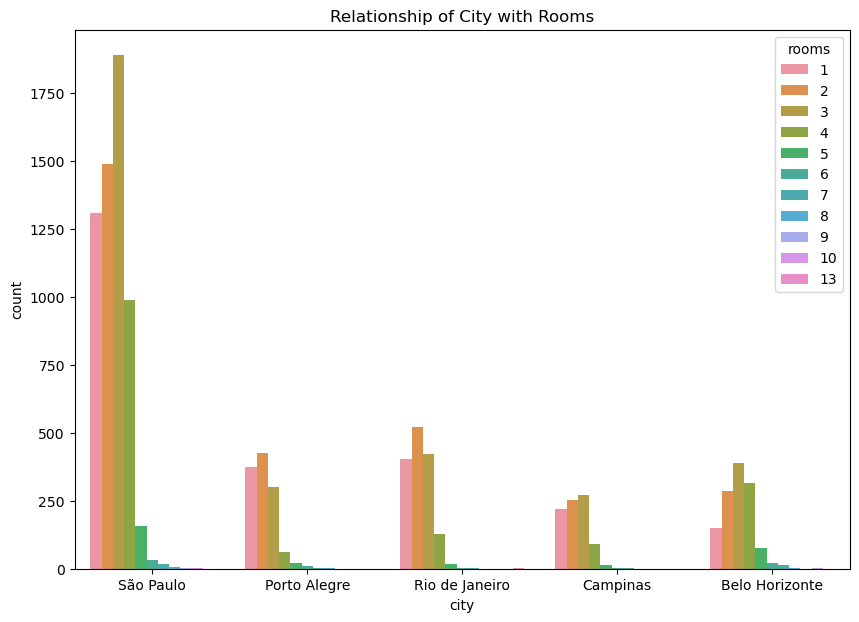

In [40]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.countplot(x = "city", hue = "rooms", data = df)
plt.title('Relationship of City with Rooms')
plt.show()

## Interpretation: By above graph we can observe the number of rooms in each city has. 

* Porto Alegre can be suitable city for bachelours as we can see there are more number of 1 and 2 rooms in the properties available for rent.
* Mid size family may require 2 to 3 rooms hence Campinas can be a suitable city for them
* Large family might need more than 3 rooms so Belo Horizonte can be suitable for large families

### Relationship of City with bathroom

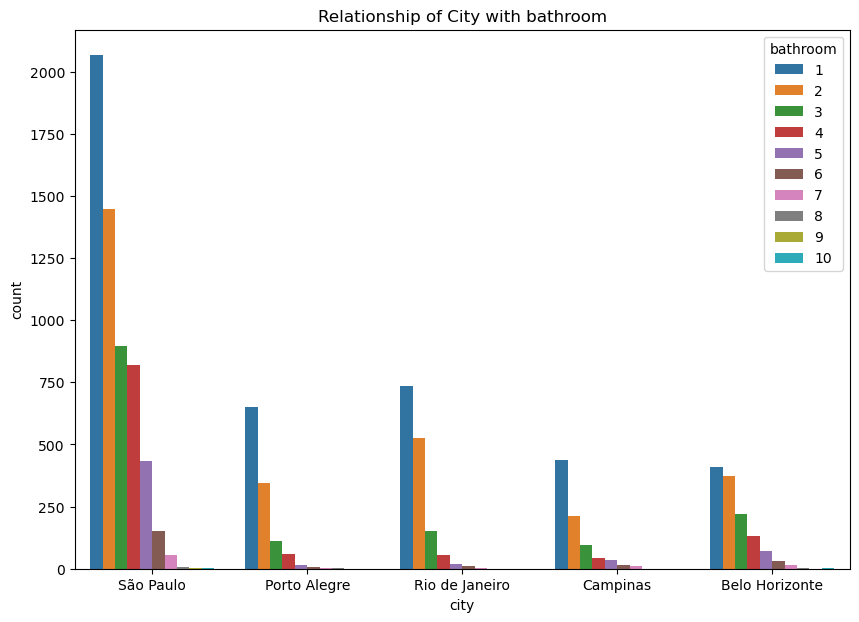

In [41]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.countplot(x = "city", hue = "bathroom", data = df)
plt.title('Relationship of City with bathroom')
plt.show()

### Interpretation: Above graph shows the distribution of number of bathrooms in each city
* most number of 1 bathroom is in city Porto Alegre which might be suitable for bachelours are they might not require more number of bathrooms
* Campinas and Belo Horizonte can be suitable city for mid size and large families

## Relationship of City with parking spaces

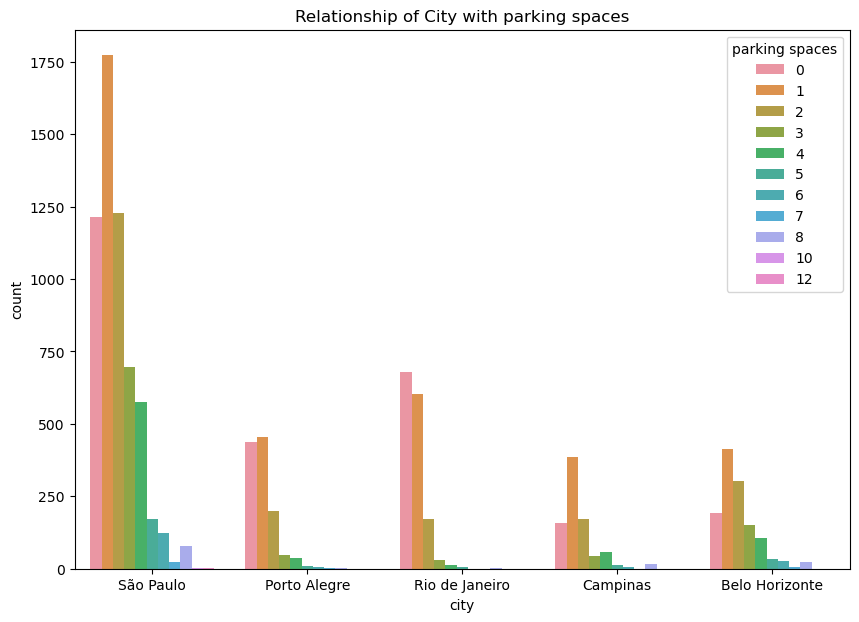

In [42]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.countplot(x = "city", hue = "parking spaces", data = df)
plt.title('Relationship of City with parking spaces')
plt.show()

## Interpretation: Above graph shows the distribution number of parking spaces in each city
* Porto Alegre has most number of 0 parking spaces while Belo Horizonte has more number of 2 and 3 parking spaces
* Bachelours might wont need parking spaces therefore city Porto Alegre is suitable for them whereas mid size family may need 1 or 2 parking spaces so city Campinas may suit them. 
* Belo Horizonte might be perfect city for large family as this city have more number of 2 and 3 parking spaces

## Relationship of City with animal

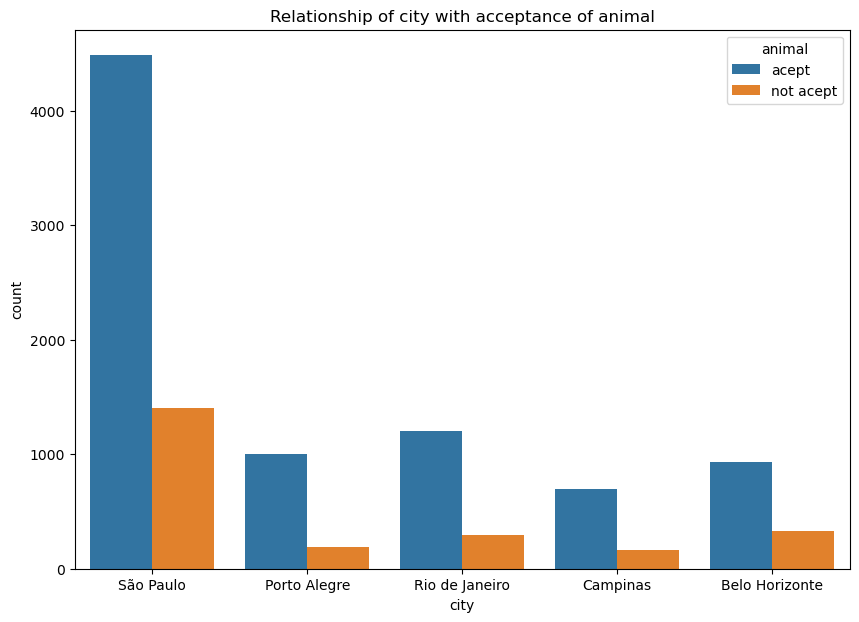

In [43]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.countplot(x = "city", hue = "animal", data = df)
plt.title('Relationship of city with acceptance of animal')
plt.show()

## Interpretation: Above graph shows the distribution of acceptance of animal


## Relationship of City with furniture

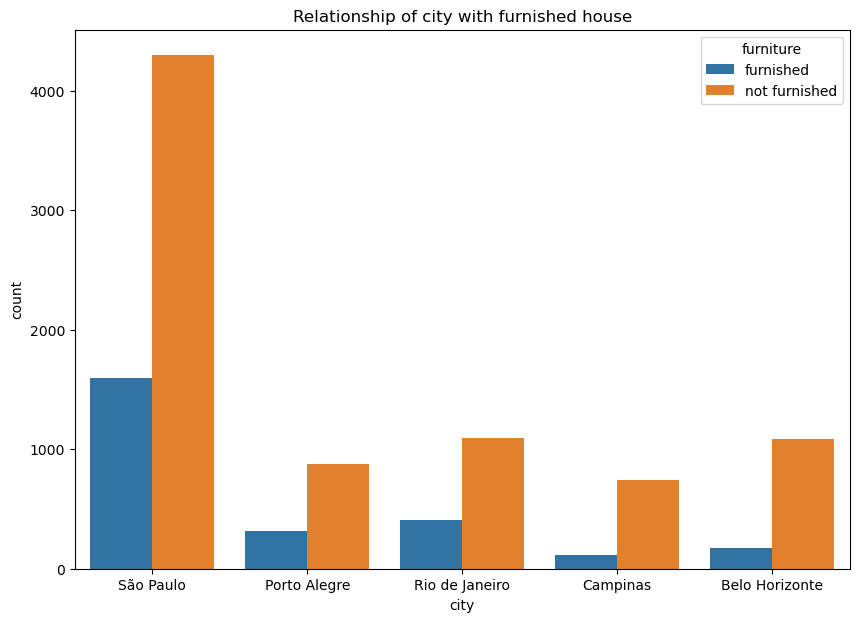

In [44]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.countplot(x = "city", hue = "furniture", data = df)
plt.title('Relationship of city with furnished house')
plt.show()

### Interpretation: Above graph shows the distribution of availability of furniture in the properties available for rent
* Large family might wont need furnitures so Belo Horizonte may be suitable forsuch family as that city contains more number of non furnished property
* Bachelours may have need of furnished property for rent as they dont have to buy every furniture by their own so Porto Alegre is suitable for them.
* As for mid size family there wont be any need of furnished property for rent so Campinas will be suitable for them

## CAT NUM ANALYSIS: Categorical to continuous

In [45]:
continuous

['area',
 'hoa (R$)',
 'rent amount (R$)',
 'property tax (R$)',
 'fire insurance (R$)',
 'total (R$)']

### Relationship of city with rent amount

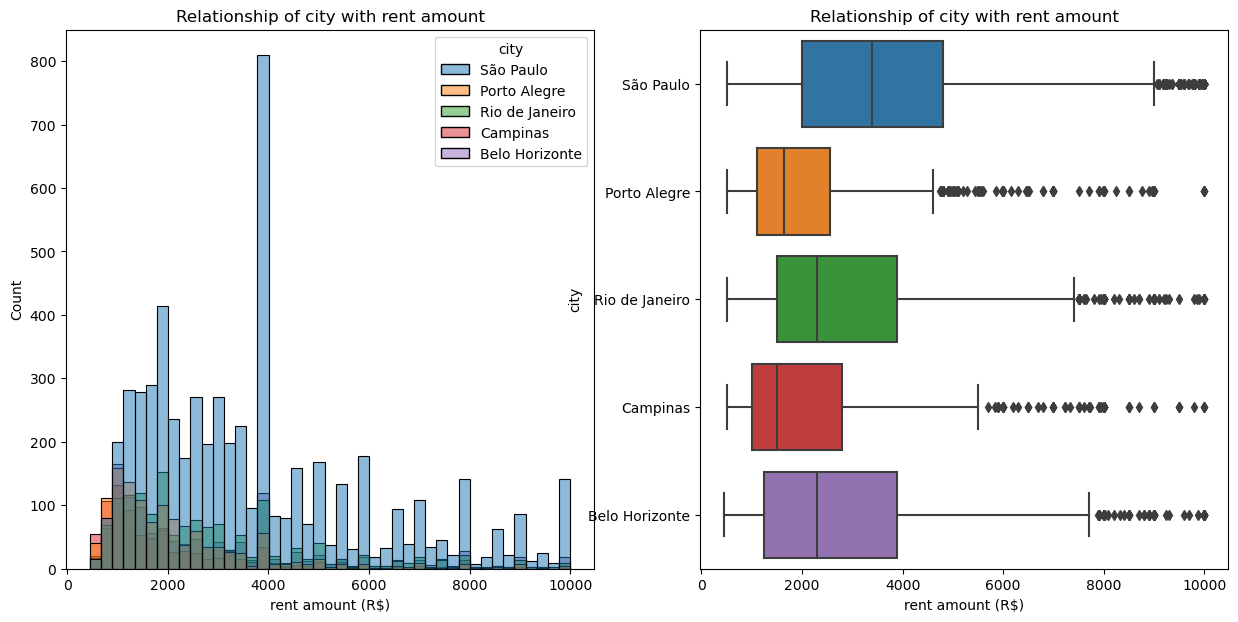

In [46]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sns.histplot(x = df["rent amount (R$)"], hue = df["city"], ax = ax[0])
sns.boxplot(y = df["city"], x = df["rent amount (R$)"], ax = ax[1])
ax[0].set_title("Relationship of city with rent amount") 
ax[1].set_title("Relationship of city with rent amount")
plt.show()

### Interpretation: Above graph shows the distribution of rent amount in each city
* Porto Alegre has the least amount of rent amount which can be affordable by bachelours.
* mid sized and large family can choose Campinas as there is a moderate rent amount for properties that are in rent

### Relationship of city with property tax (R$)

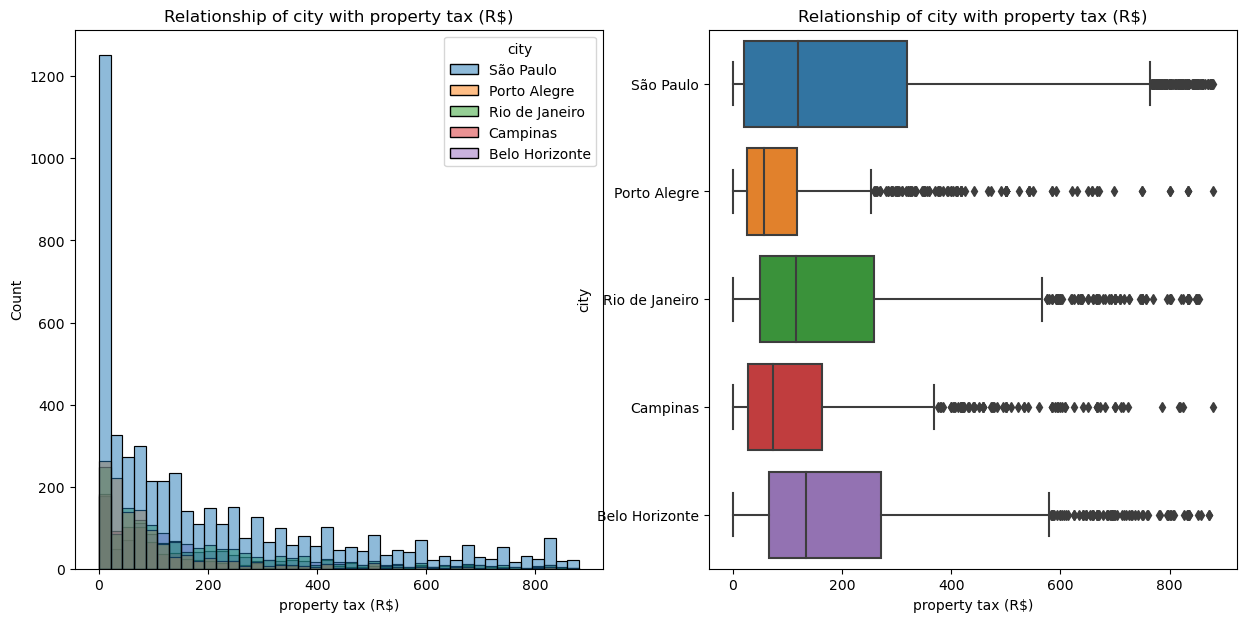

In [47]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sns.histplot(x = df["property tax (R$)"], hue = df["city"], ax = ax[0])
sns.boxplot(y = df["city"], x = df["property tax (R$)"], ax = ax[1])
ax[0].set_title("Relationship of city with property tax (R$)") 
ax[1].set_title("Relationship of city with property tax (R$)")
plt.show()

### Interpretation: Above graph shows the distribution of property tax in each city
* Porto Alegre has the least amount of property tax which can be affordable by bachelours.
* Campinas have a moderate amount of property tax hence suitable for mid size family

### Relationship of city with total (R$)

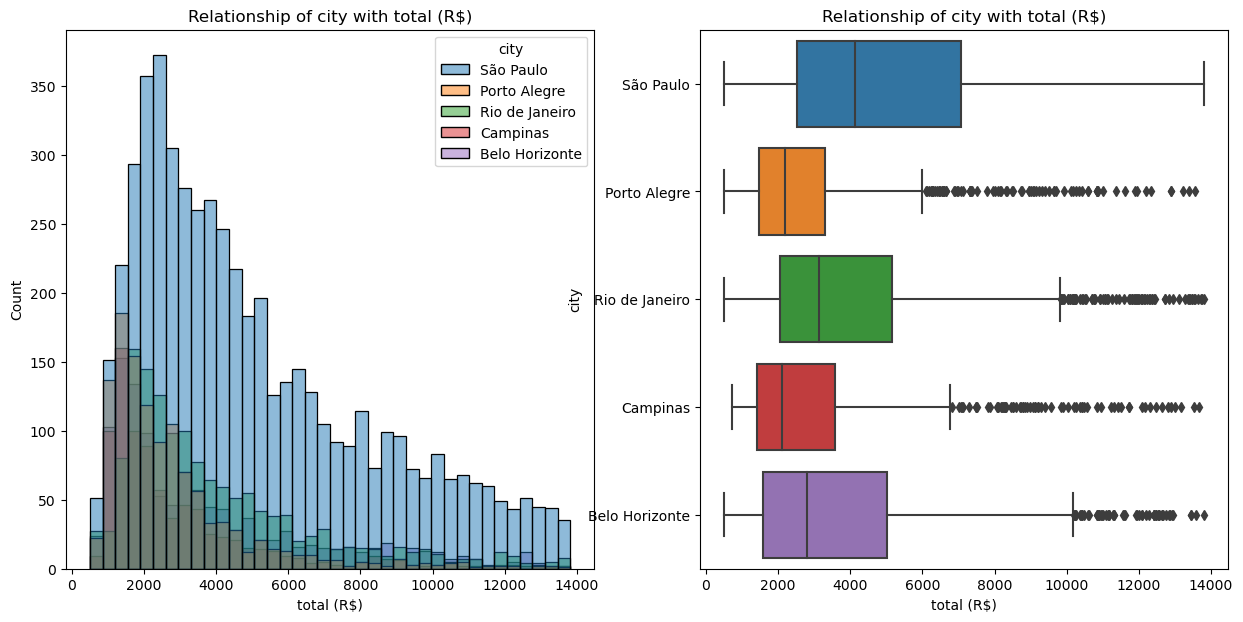

In [48]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sns.histplot(x = df["total (R$)"], hue = df["city"], ax = ax[0])
sns.boxplot(y = df["city"], x = df["total (R$)"], ax = ax[1])
ax[0].set_title("Relationship of city with total (R$)") 
ax[1].set_title("Relationship of city with total (R$)")
plt.show()

### Interpretation: Above graph shows the distribution of total amount in each city
* Bachelours would most probably settle for properties for rent that has minimum cost so Porto Alegre is suitable for the.
* total amount of properties in Campinas and Belo Horizonte are moderate hence suitable for mid size and large families

### Relationship of city with hoa (R$)

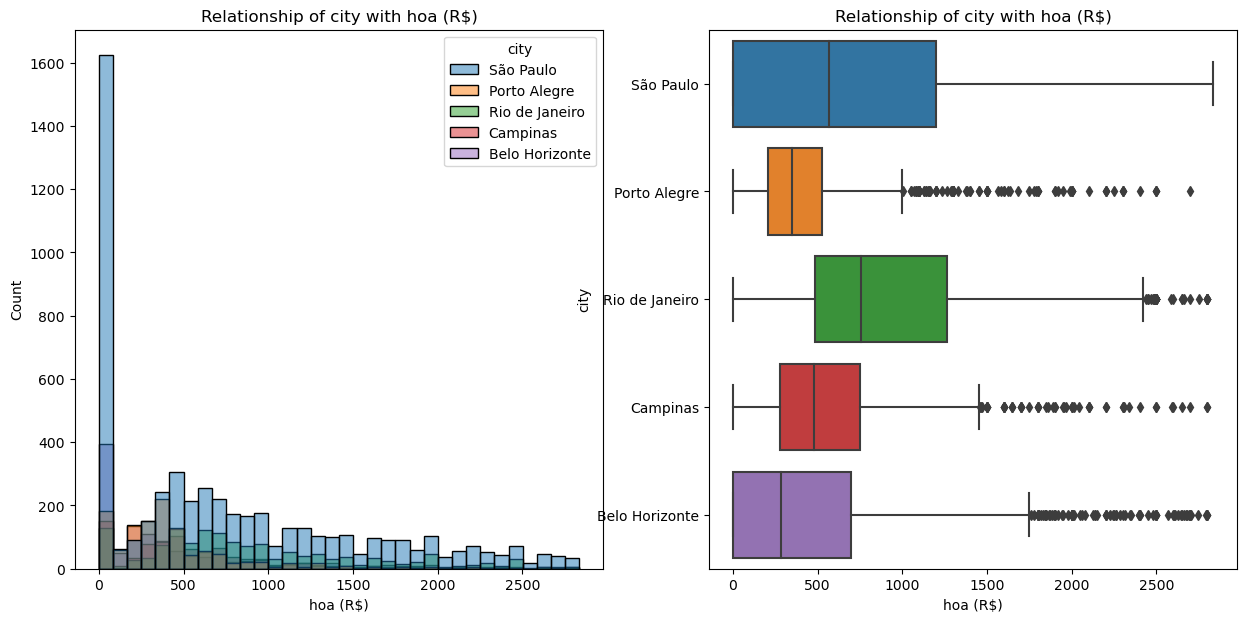

In [49]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sns.histplot(x = df["hoa (R$)"], hue = df["city"], ax = ax[0])
sns.boxplot(y = df["city"], x = df["hoa (R$)"], ax = ax[1])
ax[0].set_title("Relationship of city with hoa (R$)") 
ax[1].set_title("Relationship of city with hoa (R$)")
plt.show()

### Interpretation: Above graph shows the distribution of houseowner association tax in each city

### Relationship of city with area

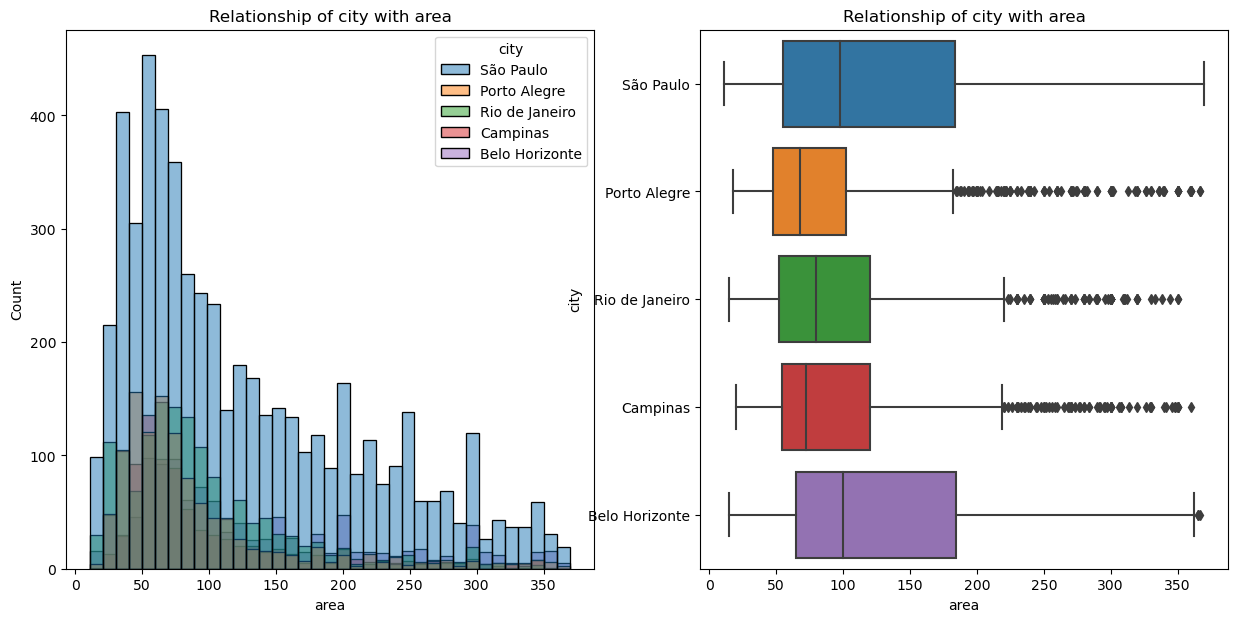

In [50]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sns.histplot(x = df["area"], hue = df["city"], ax = ax[0])
sns.boxplot(y = df["city"], x = df["area"], ax = ax[1])
ax[0].set_title("Relationship of city with area") 
ax[1].set_title("Relationship of city with area")
plt.show()

### Interpretation: Above graph shows the distribution of area of properties in each city
* Bachelours might not want properties with large area for rent hence city Porto Alegre is suitable for them because this city has house with least area.
* Campinas is sutable for mid size family as the might not need a big or very small area of house
* Large family needs more area for their house so as Belo Horizonte has properties with more area this city is suitable for large family

# CONCLUSION

## By overall analysis Porto Alegre appears to be a suitable city for bachelors. This city likely offers a higher propotion of smaller accomadation, which aligns with the needs of bachelors. Additionally the city has higher acceptance of animals with lower rent amount that other cities which could be attractive to bachelors 

## Campinas emerges as a favourable city for mid sized families. It offers a variety of housing options with sufficient number of rooms, parking spaces, bathrooms that are suitable for the mid sized family needs.

## Belo Horizonte is identified as a suitable city for large family based on the analysis. The city likely provides a higher number of housing option with large number of rooms, parking spaces, bathrooms etc, accommodating the space requirement for large families 
